In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display

In [2]:
#URL for raw csv data
url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/D3.csv'

df = pd.read_csv(url)

In [3]:
# Separate features and labels
x1 = df.values[:, 0] # get input values from first column -- x1 is a list here
x2 = df.values[:, 1] # get input values from first column -- x2 is a list here
x3 = df.values[:, 2] # get input values from first column -- x3 is a list here
y = df.values[:, 3] # get output values from fourth column -- Y is the list here

m = len(y) # Number of training examples
n = len(x1) # Number of training examples

x_0 = np.ones((m, 1)) #a column vector of ones. This will be used as the "bias" term for the linear regression model.

x_1 = x1.reshape(m, 1) #reshaping features (x1) to make it a 2D array suitable for matrix operations.
x_2 = x2.reshape(m, 1) #reshaping features (x2) to make it a 2D array suitable for matrix operations.
x_3 = x3.reshape(m, 1) #reshaping features (x3) to make it a 2D array suitable for matrix operations.

X1 = np.hstack((x_0, x_1)) #horizontally stacking x_0 and x_1 to create a feature matrix X1.
X2 = np.hstack((x_0, x_2)) #horizontally stacking x_0 and x_2 to create a feature matrix X2.
X3 = np.hstack((x_0, x_3)) #horizontally stacking x_0 and x_3 to create a feature matrix X3.

theta1 = np.zeros(2)
theta2 = np.zeros(2)
theta3 = np.zeros(2)

Define Cost Function Algorithm

In [4]:
def compute_cost(X, Y, theta):
  predictions = X.dot(theta)
  errors = np.subtract(predictions, Y)

  J = 1 / (2 * m) * np.sum(np.square(errors))
  return J

In [5]:
cost1 = compute_cost(X1, y, theta1)
cost2 = compute_cost(X2, y, theta2)
cost3 = compute_cost(X3, y, theta3)

#compute the cost for theta values
print('The cost for given values of theta_0 and theta_1 for X1 =', cost1)
print('The cost for given values of theta_0 and theta_1 for X2 =', cost2)
print('The cost for given values of theta_0 and theta_1 for X3 =', cost3)

The cost for given values of theta_0 and theta_1 for X1 = 5.524438459196242
The cost for given values of theta_0 and theta_1 for X2 = 5.524438459196242
The cost for given values of theta_0 and theta_1 for X3 = 5.524438459196242


In [6]:
def gradient_descent(X,Y,theta,alpha,iterations):
  cost_history = np.zeros(iterations)

  for i in range(iterations):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, Y)
    sum_delta = (1 / m) * X.transpose().dot(errors)

    theta = theta - (alpha * sum_delta)

    cost_history[i] = compute_cost(X,Y,theta)

  return theta, cost_history

In [7]:
iterations = 1500
alpha = 0.01

In [8]:
theta1, cost_history_1 = gradient_descent(X1, y, theta1, alpha, iterations)
theta2, cost_history_2 = gradient_descent(X2, y, theta2, alpha, iterations)
theta3, cost_history_3 = gradient_descent(X3, y, theta3, alpha, iterations)

#1. Report the linear model you found for each explanatory variable.
print('\nLinear Model for X1: h(x) = ', theta1[0], " +", theta1[1], "* x")
print('Linear Model for X2: h(x) = ', theta2[0], "+ ", theta2[1], "* x")
print('Linear Model for X3: h(x) = ', theta3[0], "+" , theta3[1], "* x")

#3. Which explanatory variable has the lower loss (cost) for explaining the output (Y)?
print('\nFinal Cost_history for X1:', cost_history_1[iterations - 1])
print('Final Cost_history for X2:', cost_history_2[iterations - 1])
print('Final Cost_history for X3:', cost_history_3[iterations - 1])


Linear Model for X1: h(x) =  5.718506528385593  + -1.9568205977732744 * x
Linear Model for X2: h(x) =  0.7198847334502397 +  0.5639033419472831 * x
Linear Model for X3: h(x) =  2.7804812909944903 + -0.4845163094735121 * x

Final Cost_history for X1: 0.9905894438682062
Final Cost_history for X2: 3.5993993982305357
Final Cost_history for X3: 3.6305262475389664


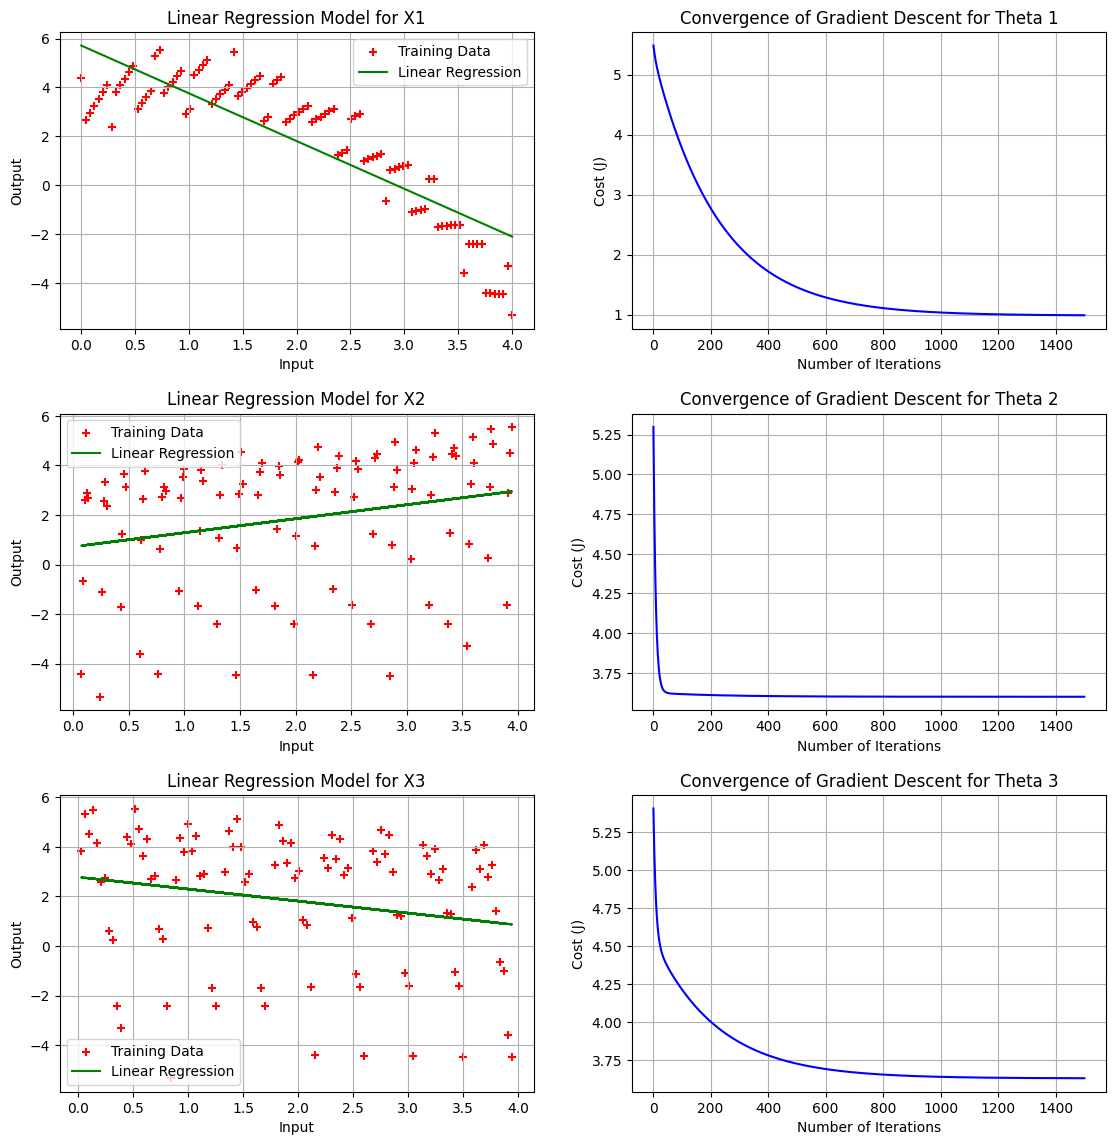

In [9]:
# Linear Regression Plot for X1
plt.subplots(3,2,figsize=(12,12))
plt.tight_layout(pad=4)
plt.subplot(3,2,1)

# Scatter plot for the training data
plt.scatter(X1[:, 1], y, color='red', marker='+', label='Training Data')
plt.plot(X1[:, 1], X1.dot(theta1), color='green', label='Linear Regression')

plt.grid(True)
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Linear Regression Model for X1')
plt.legend()

# Gradient Descent Plot for X1
plt.subplot(3,2,2)
plt.plot(range(1, iterations + 1), cost_history_1, color='blue')
plt.grid(True)

plt.xlabel('Number of Iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent for Theta 1')

# --------------------------------------------------------------------------------------------

# Linear Regression Plot for X2
plt.subplot(3,2,3)
plt.scatter(X2[:, 1], y, color='red', marker='+', label='Training Data')
plt.plot(X2[:, 1], X2.dot(theta2), color='green', label='Linear Regression')

plt.grid(True)
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Linear Regression Model for X2')
plt.legend()

# Gradient Descent Plots
plt.subplot(3,2,4)
plt.plot(range(1, iterations + 1), cost_history_2, color='blue')
plt.grid(True)

plt.xlabel('Number of Iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent for Theta 2')

# --------------------------------------------------------------------------------------------

# Linear Regression Plot for X3
plt.subplot(3,2,5)
plt.scatter(X3[:, 1], y, color='red', marker='+', label='Training Data')
plt.plot(X3[:, 1], X3.dot(theta3), color='green', label='Linear Regression')

plt.grid(True)
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Linear Regression Model for X3')
plt.legend()


# Gradient Descent Plot
plt.subplot(3,2,6)
plt.plot(range(1, iterations + 1), cost_history_3, color='blue')
plt.grid(True)

plt.xlabel('Number of Iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent for Theta 3')

plt.show()